In [ ]:
#this copy is to measure time of computing the kernel of one graph with 1000 samples
!pip install grakel 
import time 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import networkx as nx
import grakel as gk 

from grakel.datasets import fetch_dataset
from grakel.kernels import ShortestPath
from grakel.kernels import GraphletSampling

     |████████████████████████████████| 1.7MB 2.8MB/s 
     |████████████████████████████████| 163kB 52.7MB/s 


/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.lfw module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
# DataSet Loading 

class dataset_loading:
    def __init__(self):
        pass 
    #SBM generator
    def generate_SBM(self,Graphs_num=300,nodes_per_graph=60,block_size=10,fraction=0.3,mult_factor=1.2,avg_deg=10,test_size=0.2):
        blocks_num=int(nodes_per_graph/block_size)
        sizes=[block_size]*blocks_num
        G,y=[],[]
        for i in range (Graphs_num):                  
            p_in=fraction  if i <Graphs_num/2 else fraction*mult_factor
            p_out=(avg_deg-(block_size-1)*p_in)/(nodes_per_graph-block_size)
            p=p_out*np.ones([blocks_num]*2)+(p_in-p_out)*np.eye(blocks_num)
            #print(p_in,p_out)
            G_cur=nx.stochastic_block_model(sizes, p)
            adj=[(i,j) for (i,j,_) in G_cur.edges(data=True)]
            node_labels=dict ((i,list(val.values())[0]) for (i,val) in G_cur.nodes(data=True) )
            
            G.append(gk.Graph(adj, node_labels=node_labels))
            y.append(-1 if i<Graphs_num/2 else 1)            
        G_train, G_test, y_train, y_test = train_test_split(G, y, test_size=test_size)
        return (G_train,y_train),(G_test,y_test)
        

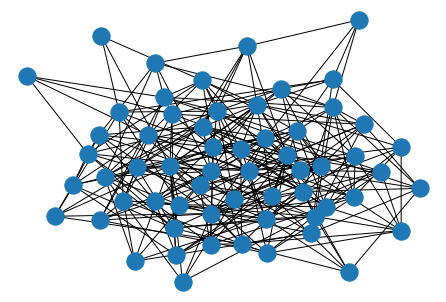

In [ ]:
(D,_),(_,_)=dataset_loading().generate_SBM(Graphs_num=50)
G=D[0] # taking one graph to be sampled
#drawing this graph 
nx.draw(nx.Graph(G.get_adjacency_matrix()))

In [ ]:
nodes_num,samples_num= range (3,36), 1000 #############
Gk_time=np.zeros(len(nodes_num)) ################
for (nodes_ind,nodes) in enumerate(nodes_num):
    print('processing k= ', nodes, '\n')
    kernel = GraphletSampling(k=nodes, sampling={'n_samples':samples_num})
    st_time=time.time()
    K_train = kernel.fit_transform([G])
    Gk_time[nodes_ind]=time.time()-st_time
np.savetxt("Gk_time.csv",Gk_time/samples_num,delimiter=',')##################################

processing k=  3 

processing k=  4 

processing k=  5 

processing k=  6 

processing k=  7 

processing k=  8 

processing k=  9 

processing k=  10 

processing k=  11 



/usr/local/lib/python3.6/dist-packages/grakel/kernels/graphlet_sampling.py:148: UserWarning: graphlets are too big - computation may be slow
  warnings.warn('graphlets are too big - '


processing k=  12 

processing k=  13 

processing k=  14 

processing k=  15 

processing k=  16 

processing k=  17 

processing k=  18 

processing k=  19 

processing k=  20 

processing k=  21 

processing k=  22 

processing k=  23 

processing k=  24 

processing k=  25 

processing k=  26 

processing k=  27 

processing k=  28 

processing k=  29 

processing k=  30 

processing k=  31 

processing k=  32 

processing k=  33 

processing k=  34 

processing k=  35 



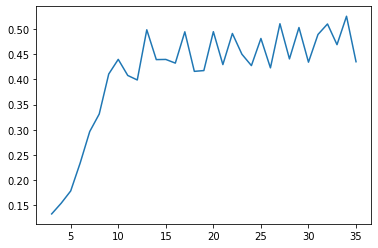

In [ ]:
from matplotlib import pyplot as plt
plt.plot(nodes_num,Gk_time)

In [ ]:
G=nx.Graph()